In [56]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# 1. 시계열 데이터 타입  (datetime)

In [2]:
from datetime import datetime

In [3]:
now = datetime.now()
print(now)
now

2020-07-24 15:19:52.881978


datetime.datetime(2020, 7, 24, 15, 19, 52, 881978)

In [4]:
now.year

2020

In [5]:
now.hour

15

<img src="img/예제실습/datetime.jpg" alt="datetime" style="width: 1200px;"/>

## 1.1 timedelta 를 활용한 시간 계산

In [6]:
from datetime import timedelta

In [7]:
now + timedelta(days=100)
    # weeks, days, hours, minutes, seconds, miliseconds, microseconds

datetime.datetime(2020, 11, 1, 15, 19, 52, 881978)

In [8]:
now + timedelta(hours=5, minutes=35)

datetime.datetime(2020, 7, 24, 20, 54, 52, 881978)

In [9]:
now2 = datetime.now()
now2

datetime.datetime(2020, 7, 24, 15, 19, 52, 954783)

In [10]:
now2 - now

datetime.timedelta(microseconds=72805)

## 1.2 편리한 색인

In [11]:
import random
sample = pd.DataFrame()
sample['날짜'] = pd.date_range(start='2020-07-23',periods=180).tolist()
sample['사용자수'] = random.sample(range(1,1000),180)
sample.head()

,날짜,사용자수
0,2020-07-23,823
1,2020-07-24,653
2,2020-07-25,699
3,2020-07-26,394
4,2020-07-27,411


In [12]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      180 non-null    datetime64[ns]
 1   사용자수    180 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.9 KB


In [13]:
sample[(sample.날짜 >='2020-08-01') & (sample.날짜 <='2020-08-31')]

,날짜,사용자수
9,2020-08-01,989
10,2020-08-02,170
11,2020-08-03,370
12,2020-08-04,115
13,2020-08-05,580
14,2020-08-06,251
15,2020-08-07,366
16,2020-08-08,502
17,2020-08-09,433
18,2020-08-10,266


In [14]:
sample2 = sample.set_index('날짜')
sample2.info()
# row index가 DatetimeIndex인 경우만 아래의 인덱싱 가능

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2020-07-23 to 2021-01-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   사용자수    180 non-null    int64
dtypes: int64(1)
memory usage: 2.8 KB


In [15]:
# sample2['2020-12-25'] 이렇게 하면 먼저 column을 찾기 때문에 안됨
sample2.loc['2020-12-25']

사용자수    454
Name: 2020-12-25 00:00:00, dtype: int64

In [16]:
sample2['2020-10-3':'2020-10-7']

,사용자수
날짜,
2020-10-03,531
2020-10-04,528
2020-10-05,249
2020-10-06,418
2020-10-07,21


In [17]:
sample2['2020-08']
# 실제로는 slicing 이기에 문제 없이 됨

,사용자수
날짜,
2020-08-01,989
2020-08-02,170
2020-08-03,370
2020-08-04,115
2020-08-05,580
2020-08-06,251
2020-08-07,366
2020-08-08,502
2020-08-09,433


## 1.3 함수 사용  1
strftime()으로 날짜 타입의 변수를 문자열로 변환하기

In [18]:
now.strftime('%Y-%m-%d')

'2020-07-24'

In [19]:
sample['월'] = sample.날짜.apply(lambda x : x.strftime('%m'))
    # strftime은 datetime만 되므로 apply와 lambda 사용해야 함
sample['월'].head()

0    07
1    07
2    07
3    07
4    07
Name: 월, dtype: object

In [20]:
sample.pivot_table(index='월', values='사용자수', aggfunc='sum')

,사용자수
월,
01,11027
07,5412
08,15077
09,15386
10,13734
11,14684
12,15362


## 1-3 함수 사용 2
strptime() 문자열을 날짜 타입으로 변환하기

In [21]:
str_time = '20/02/17'
datetime.strptime(str_time, '%y/%m/%d')

datetime.datetime(2020, 2, 17, 0, 0)

### (실습 #1) 아래 df에서 2019년 7월 데이터만 선택하기

In [22]:
df = pd.DataFrame({'날짜': ['20190701', '20190702', '20190705', '20190710', '20190723',
                          '20190724', '20190728', '20190805', '20190810', '20190823'],
                   '사용자수': random.sample(range(1, 100), 10)
                   })
df

,날짜,사용자수
0,20190701,21
1,20190702,47
2,20190705,25
3,20190710,59
4,20190723,98
5,20190724,55
6,20190728,45
7,20190805,33
8,20190810,62
9,20190823,6


In [23]:
df.날짜.apply(lambda x : datetime.strptime(x, '%Y%m%d'))

0   2019-07-01
1   2019-07-02
2   2019-07-05
3   2019-07-10
4   2019-07-23
5   2019-07-24
6   2019-07-28
7   2019-08-05
8   2019-08-10
9   2019-08-23
Name: 날짜, dtype: datetime64[ns]

In [24]:
pd.to_datetime(df.날짜, format ='%Y%m%d')

0   2019-07-01
1   2019-07-02
2   2019-07-05
3   2019-07-10
4   2019-07-23
5   2019-07-24
6   2019-07-28
7   2019-08-05
8   2019-08-10
9   2019-08-23
Name: 날짜, dtype: datetime64[ns]

In [25]:
df.날짜.astype('datetime64')

0   2019-07-01
1   2019-07-02
2   2019-07-05
3   2019-07-10
4   2019-07-23
5   2019-07-24
6   2019-07-28
7   2019-08-05
8   2019-08-10
9   2019-08-23
Name: 날짜, dtype: datetime64[ns]

In [26]:
df['날짜'] = df.날짜.astype('datetime64')
df.set_index('날짜')['2019-07']

,사용자수
날짜,
2019-07-01,21
2019-07-02,47
2019-07-05,25
2019-07-10,59
2019-07-23,98
2019-07-24,55
2019-07-28,45


In [27]:
# 심화 - Week와 요일 정보 얻기
# 참고 사이트 : https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

# %U : week number (sunday to monday) (e.g. 00, 01, ...53)
# %V : ISO 8601 week number (monday to sunday) (e.g. 01, 02, ... 53)
# %a : weekday (Sun, Mon, ..) 
# %w : weekday (0,1,2,3,...) (0 = Sunday)
now.strftime('%W')

'29'

### (실습 #2) df에  주(%V), 요일(%w) 컬럼 추가

In [28]:
df['주'] = df.날짜.apply(lambda x : datetime.strftime(x,'%V'))
df['요일'] = df.날짜.apply(lambda x : datetime.strftime(x,'%w'))

In [29]:
df

,날짜,사용자수,주,요일
0,2019-07-01,21,27,1
1,2019-07-02,47,27,2
2,2019-07-05,25,27,5
3,2019-07-10,59,28,3
4,2019-07-23,98,30,2
5,2019-07-24,55,30,3
6,2019-07-28,45,30,0
7,2019-08-05,33,32,1
8,2019-08-10,62,32,6
9,2019-08-23,6,34,5


### (실습 #3-1) 주차별 사용자수 컬럼의 합 구하기


In [30]:
df.groupby('주').sum()

,사용자수
주,
27,93
28,59
30,198
32,95
34,6


### (실습 #3-2) 요일별 사용자수 컬럼의 합 구하기

In [31]:
df.groupby('요일').sum()

,사용자수
요일,
0,45
1,54
2,145
3,114
5,31
6,62


## 2. 푸드코트 주문 데이터 분석

In [32]:
# 데이터 읽기
식당 = pd.read_excel('data/food_order.xlsx')
식당.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           6825 non-null   datetime64[ns]
 1   dine_type      6825 non-null   object        
 2   corner         6825 non-null   object        
 3   menu           6825 non-null   object        
 4   is_sold_out    6825 non-null   object        
 5   use_count      6825 non-null   int64         
 6   pred_count     6825 non-null   int64         
 7   additional     6825 non-null   int64         
 8   good           6825 non-null   int64         
 9   ok             6825 non-null   int64         
 10  bad            6825 non-null   int64         
 11  diff_use_pred  6825 non-null   int64         
 12  year           6825 non-null   int64         
 13  month          6825 non-null   int64         
 14  day            6825 non-null   int64         
 15  wday           6825 n

In [33]:
# 'date' 컬럼을 row index label로 지정
식당.set_index('date',inplace=True)

In [34]:
# 데이터 탐색 - 수집 기간
print(식당.index.min(), '~', 식당.index.max())

2013-08-06 00:00:00 ~ 2015-07-27 00:00:00


In [35]:
식당.wday.value_counts()

0    1433
1    1432
2    1373
3    1298
4    1289
Name: wday, dtype: int64

### date_range()를 활용한 고급 기법

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html

특정 주기로 날짜를 생성 - freq 인자
상세 내용은 https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases 확인

D: 일단위
W: 주 단위 (일요일만 선택)
W-MON: 주 단위이되, 월요일만 선택
W-TUE: 주 단위이되, 화요일만 선택. WED, THU, FRI, SAT, SUN 모두 가능
M: 매달 마지막날만 선택
MS: 매달 첫째날만 선택
B: 주중만 선택 (Business day)

In [36]:
# 데이터 탐색 - 수집 기간 동안 누락 없이 데이터가 수집되었는지 확인
pd.date_range(start='2020-01-30',periods=5)
    # periods 대신 end 가능

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03'],
              dtype='datetime64[ns]', freq='D')

In [37]:
pd.date_range(start='2020-01-30',periods=5,freq='3D')

DatetimeIndex(['2020-01-30', '2020-02-02', '2020-02-05', '2020-02-08',
               '2020-02-11'],
              dtype='datetime64[ns]', freq='3D')

In [38]:
pd.date_range(start='2020-01-30',periods=5,freq='3H')

DatetimeIndex(['2020-01-30 00:00:00', '2020-01-30 03:00:00',
               '2020-01-30 06:00:00', '2020-01-30 09:00:00',
               '2020-01-30 12:00:00'],
              dtype='datetime64[ns]', freq='3H')

In [39]:
pd.date_range(start='2020-01-30',periods=7,freq='B')
    # freq='B'는 주중 날짜만 생성됨

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07'],
              dtype='datetime64[ns]', freq='B')

In [40]:
bdays = pd.date_range(start=식당.index.min(), end=식당.index.max(),freq='B')

In [41]:
len(bdays) - len(식당.index.unique())

35

In [42]:
pd.to_datetime(list(set(bdays) - set(식당.index)))

DatetimeIndex(['2015-01-01', '2013-08-16', '2013-08-07', '2015-02-19',
               '2014-01-31', '2014-09-09', '2014-06-04', '2013-08-15',
               '2013-10-09', '2015-04-03', '2015-02-18', '2015-05-01',
               '2014-04-04', '2014-05-01', '2013-08-08', '2014-06-06',
               '2014-10-03', '2013-09-20', '2013-10-03', '2014-01-01',
               '2014-01-30', '2015-02-20', '2014-08-15', '2015-05-05',
               '2013-09-18', '2014-05-06', '2014-05-05', '2014-10-09',
               '2014-12-25', '2014-09-08', '2013-12-25', '2014-09-10',
               '2013-08-09', '2013-09-19', '2015-05-25'],
              dtype='datetime64[ns]', freq=None)

In [43]:
bdays[~bdays.isin(식당.index.unique())]

DatetimeIndex(['2013-08-07', '2013-08-08', '2013-08-09', '2013-08-15',
               '2013-08-16', '2013-09-18', '2013-09-19', '2013-09-20',
               '2013-10-03', '2013-10-09', '2013-12-25', '2014-01-01',
               '2014-01-30', '2014-01-31', '2014-04-04', '2014-05-01',
               '2014-05-05', '2014-05-06', '2014-06-04', '2014-06-06',
               '2014-08-15', '2014-09-08', '2014-09-09', '2014-09-10',
               '2014-10-03', '2014-10-09', '2014-12-25', '2015-01-01',
               '2015-02-18', '2015-02-19', '2015-02-20', '2015-04-03',
               '2015-05-01', '2015-05-05', '2015-05-25'],
              dtype='datetime64[ns]', freq=None)

In [44]:
# 데이터 탐색 - corner 별 수집횟수 확인
식당.corner.value_counts()

rice & soup 1    1422
take out         1381
after school      929
grill & fry       925
noodle bar        923
burger&pizza      913
rice & soup 2     332
Name: corner, dtype: int64

In [45]:
식당[식당.corner == 'rice & soup 2']

,dine_type,corner,menu,is_sold_out,use_count,pred_count,additional,good,ok,bad,diff_use_pred,year,month,day,wday
date,,,,,,,,,,,,,,,
2014-02-25,lunch,rice & soup 2,두부편육보쌈&무생채,F,200,0,0,0,0,0,-200,2014,2,25,1
2014-02-26,lunch,rice & soup 2,버섯불고기,F,248,0,0,0,0,0,-248,2014,2,26,2
2014-02-27,lunch,rice & soup 2,쇠고기국밥,T,249,0,0,0,0,0,-249,2014,2,27,3
2014-02-28,lunch,rice & soup 2,대구지리탕,T,101,0,0,0,0,0,-101,2014,2,28,4
2014-03-03,lunch,rice & soup 2,닭살백숙,T,383,0,0,0,0,0,-383,2014,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-21,lunch,rice & soup 2,모둠채소쌈밥,F,249,0,0,63,22,4,-249,2015,7,21,1
2015-07-22,lunch,rice & soup 2,도토리묵밥,F,238,0,0,49,29,7,-238,2015,7,22,2
2015-07-23,lunch,rice & soup 2,쇠고기영양탕,F,158,0,0,28,9,1,-158,2015,7,23,3


#### (실습 #4) 날짜 색인
- 1) 2014년 데이터만 선택하여 출력
- 2) 2015년 1월 데이터만 선택하여 출력
- 3) 2014년 8월 1일부터 2014년 9월 25일까지 데이터만 출력
- 4) 2015년 6월 30일 데이터만 출력

In [46]:
식당['2014']
식당['2015-01']
식당['2014-08-01':'2014-09-25']
식당.loc['2015-06-30']

,dine_type,corner,menu,is_sold_out,use_count,pred_count,additional,good,ok,bad,diff_use_pred,year,month,day,wday
date,,,,,,,,,,,,,,,
2015-06-30,dinner,take out,비엔나소시지컵밥,F,116,110,10,0,0,0,4,2015,6,30,1
2015-06-30,lunch,take out,콥샐러드,F,281,300,0,3,0,0,19,2015,6,30,1
2015-06-30,lunch,rice & soup 1,감자탕,F,230,250,10,63,46,30,30,2015,6,30,1
2015-06-30,lunch,after school,짜파게티,F,147,190,0,85,21,2,43,2015,6,30,1
2015-06-30,lunch,burger&pizza,콤비네이션피자,F,93,140,0,44,15,3,47,2015,6,30,1
2015-06-30,dinner,grill & fry,불고기채소비빔밥,F,145,200,0,31,11,2,55,2015,6,30,1
2015-06-30,breakfast,take out,샌드위치콤보&음료&과일,F,60,40,10,0,1,0,-10,2015,6,30,1
2015-06-30,dinner,after school,햄모둠라면,T,113,100,10,20,16,3,-3,2015,6,30,1
2015-06-30,dinner,burger&pizza,왕소시지김치그라탕,F,82,110,10,14,12,2,38,2015,6,30,1


## (실습 #5) 푸드코트 데이터 분석
- 1) 전체 기간 동안, 가장 많은 판매량을 올렸던 날 찾기
- 2) 전체 기간 동안, 아침, 점심, 저녁 메뉴로 가장 인기 있었던 메뉴를 각각 착기
- 3) 2014년 한 해 동안, 각 코너 별  월별 판매량을 그래프로 시각화하기
- 4) 매진을 가장 많이 기록한 상위 10개 메뉴와 매진횟수를 출력
- 5) 2014년도에 가장 많이 팔린 상위 10개 메뉴 구하기
- 6) 5)에서 구한 상위 10개 메뉴에 대한 월별 판매 추이 그래프 그리기 (하루 평균 판매량)
- 7) 5)에서 구한 상위 10개 메뉴에 대한 분기별 판매 추이 그래프 그리기 (하루 평균 판매량)

### 5-1) 전체 기간 동안, 가장 많은 판매량을 올렸던 날 찾기

In [47]:
식당.pivot_table(index='date', values='use_count', aggfunc='sum')\
    .sort_values(by='use_count', ascending=False).head()
# index = row index label 사용 가능

,use_count
date,
2013-10-23,4267
2013-10-15,3627
2013-09-03,3581
2013-10-01,3569
2013-12-10,3568


### 5-2) 전체 기간 동안, 아침, 점심, 저녁 메뉴로 가장 인기 있었던 메뉴를 각각 착기

In [48]:
메뉴별판매량 = 식당.pivot_table(index='menu', columns='dine_type',
                        values='use_count', aggfunc='sum')

In [49]:
메뉴별판매량.sort_values('breakfast',ascending=False).head()

dine_type,breakfast,dinner,lunch
menu,,,
샌드위치콤보&음료&과일,7754.0,NaN,NaN
A: 샌드위치 SET 510kcal,1593.0,NaN,NaN
A: 샌드위치 SET 510,1377.0,NaN,NaN
샌드위치콤보&음료&사과,1202.0,NaN,NaN
NC모닝,1198.0,NaN,NaN


In [50]:
메뉴별판매량.dinner.sort_values(ascending=False).head()

menu
로제컵파스타&새우튀김        7560.0
미트볼라이스             6315.0
토마토미트볼컵파스타         5391.0
비엔나소시지컵밥*스크램블에그    3742.0
참치김치찌개             3692.0
Name: dinner, dtype: float64

### 5-3) 2014년 한 해 동안, 각 코너 별  월별 판매량을 그래프로 시각화하기 

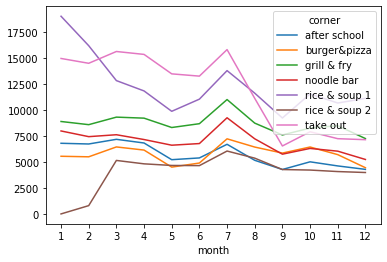

In [67]:
ex3 = 식당['2014'].pivot_table(index='month',columns='corner',\
                       values='use_count', aggfunc='sum').fillna(0)
ex3.plot()
plt.xticks(ex3.index)
plt.show()

### 5-4) 매진을 가장 많이 기록한 상위 10개 메뉴와 매진횟수를 출력

In [52]:
식당[식당.is_sold_out == "T"].menu.value_counts().sort_values(ascending=False).head(10)

치즈돈가스          14
등심돈가스          13
김치볶음밥&계란후라이    11
고르곤졸라피자         9
고구마돈가스          9
양식돈가스           8
치즈버거            7
카레라이스           7
사골떡만두국          6
간자장면            6
Name: menu, dtype: int64

### 5-5) 2014년도에 가장 많이 팔린 상위 10개 메뉴 구하기

In [53]:
ex5 = 식당['2014'].groupby('menu').use_count.sum().sort_values(ascending=False).head(10)
ex5

menu
돈가스샐러드         7949
로제컵파스타&새우튀김    7560
훈제오리&단호박샐러드    7448
콥샐러드           7317
참치김치찌개         5783
토마토미트볼컵파스타     5391
등심돈가스          5007
미트볼라이스         4950
돈안심샐러드         4113
불고기채소비빔밥       3993
Name: use_count, dtype: int64

### 5-6) 5)에서 구한 상위 10개 메뉴에 대한 월별 판매 추이 그래프 그리기 (하루 평균 판매량)

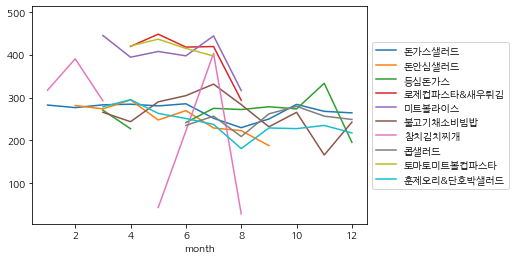

In [76]:
plt.rc('font', family='NanumGothic')
ex6 = 식당[식당.menu.isin(ex5.index)]['2014']
ex6.groupby(['menu','month']).use_count.mean().unstack('menu').plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### 5-7) 5)에서 구한 상위 10개 메뉴에 대한 분기별 판매 추이 그래프 그리기 (하루 평균 판매량)

In [81]:
pd.Timestamp(now).quarter
# Timestamp는 Datetime과 비슷

3

In [86]:
ex6['quarter'] = ex6.index.quarter
ex6.head()

,dine_type,corner,menu,is_sold_out,use_count,pred_count,additional,good,ok,bad,diff_use_pred,year,month,day,wday,quarter
date,,,,,,,,,,,,,,,,
2014-01-02,lunch,rice & soup 1,참치김치찌개,F,683,0,0,0,0,0,-683,2014,1,2,3,1
2014-01-06,dinner,rice & soup 1,참치김치찌개,F,298,0,0,0,0,0,-298,2014,1,6,0,1
2014-01-07,dinner,take out,미트볼라이스,F,491,0,0,0,0,0,-491,2014,1,7,1,1
2014-01-09,lunch,take out,훈제오리&단호박샐러드,F,269,0,0,0,0,0,-269,2014,1,9,3,1
2014-01-17,lunch,take out,콥샐러드,F,274,0,0,0,0,0,-274,2014,1,17,4,1


In [89]:
ex7 = ex6.pivot_table(index='quarter',columns='menu', values='use_count',aggfunc='mean').fillna(0)

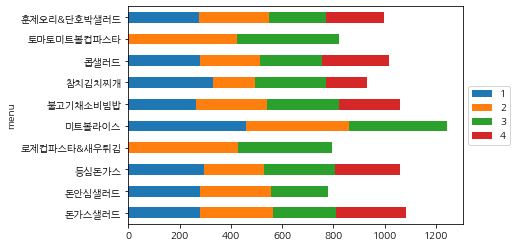

In [97]:
ex7.T.plot(kind='barh', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()